In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization
from keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [2]:
train = pd.read_csv("~/Documents/Data/MNIST/mnist_train.csv")

In [14]:
test = pd.read_csv("~/Documents/Data/MNIST/mnist_test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
train_x = train.iloc[:,1:] 

In [206]:
train_y = train.iloc[:,0]

In [207]:
train_x_array = np.asarray(train_x).reshape((train_x.shape[0],28,28,1))
train_x_array.shape

(42000, 28, 28, 1)

In [157]:
cv_x = train.iloc[40000:,1:] 
cv_y = train.iloc[40000:,0]

In [158]:
cv_x = np.asarray(cv_x).reshape((2000,28,28,1))
cv_y_onehot = convert_one_hot(cv_y)
print(cv_x.shape)
print(cv_y_onehot.shape)

(2000, 10)
(2000, 28, 28, 1)
(2000, 10)


In [116]:
test_x = np.asarray(test).reshape((28000,28,28,1))
test_x = test_x 
test_x.shape


(28000, 28, 28, 1)

In [208]:
def convert_one_hot(label):
    num_class = len(label.unique())
    zeros = np.zeros((label.shape[0],num_class))
    print(zeros.shape)
    for i in range(label.shape[0]):
        zeros[i,label.iloc[i]] =1
    return zeros

train_y_onehot = convert_one_hot(train_y)
train_y_onehot = np.asarray(train_y_onehot)

(42000, 10)


This is a 0


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


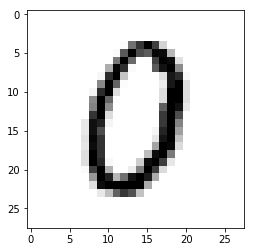

In [8]:
image = train_x.iloc[5].reshape((28,28))
plt.imshow(image,cmap = 'binary')
print("This is a {}".format(train_y.iloc[5]))

In [209]:
def CNN_model(input_shape):
    
    X_input = Input(input_shape)
    
    ## filter size 3, padding = (3-1)/2 = 1
    X = ZeroPadding2D((1,1))(X_input)
    
    X = Conv2D(filters = 16,kernel_size=(3,3),strides=(1,1),padding='SAME',name='Conv0',kernel_initializer='glorot_uniform')(X)
    X = BatchNormalization(axis=3,name='Bn0')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = 32, kernel_size=(3,3),strides=(1,1),padding='SAME',name='Conv1',kernel_initializer = 'glorot_uniform')(X)
    X = BatchNormalization(axis=3,name='Bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size=(2,2),name='MaxPool')(X)
    X = Flatten()(X)
    X = Dense(10,activation='softmax')(X)
    
    model = Model(inputs = X_input,outputs=X,name='CNN_model')
    
    return model
    
    
    
    
    
    

In [210]:
cnn_model = CNN_model(train_x_array.shape[1:])

In [211]:
cnn_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_model.fit(train_x_array,train_y_onehot,batch_size=42,epochs=20)

Epoch 1/20
42000/42000 [==============================] - 100s - loss: 0.1669 - acc: 0.9497      

In [213]:
pred = cnn_model.predict(test_x)

In [220]:
cnn_model.evaluate(x=cv_x,y=cv_y_onehot)

1952/2000 [============================>.] - ETA: 0s 

[0.0013804147326754901, 0.99950000000000006]

In [214]:
pred = np.argmax(pred,axis=1)

In [215]:
pred_df = pd.DataFrame(pred,columns=['Label'])

In [216]:
pred_df["ImageId"] = np.arange(1,pred_df.shape[0]+1)

In [217]:
pred_df = pred_df[["ImageId","Label"]]

In [218]:
pred_df.to_csv("~/Downloads/kreas_pred_16_32.csv",index=False)

In [219]:
pred_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
